<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/Others/blob/SKLearn_Introduction/ScikitLearn_RegressionClassificationClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn: Working with regression, classification and clustering

In this course, we will understand how the sci-kit learn library can be used to perform predictions using Python. We will perform some applications of supervised and non-supervised learning using different methods.

First, we will understand our dataset, and create training and test sets. Then, we will fit a classification algorithm, and try to make a prediction based on our classification model. After that, we will show how to use a regression model, and how these are able to provide predictions for continuous variables. Finally, we will use another dataset to work with clustering, and we will understand how to cluster our data in different types using an unsupervised learning algorithm.

## Machine learning

Machine learning is a field where users try to make machines learn from previous data. Machines learn **more** when they have **more data** to be based on. 

Our machine will be trained until it can, by itself, perform some action or procedure.

Some examples of applications of machine learning:

*   Fraud alert
*   Face recognition
*   Recomendation algorithm
*   Spam detector

There are two main types of Machine Learning algorithms, which are applied to very different problems: supervised and unsupervised learning.

1.   Supervised learning: Data has a target column. Thus, we usually want to predict a given target on a given data point. For instance, such algorithm can be used for classification of data.
2.   Unsupervised learning: There is no target in our data. Usually, these algorithms try to cluster data in a specific and smart manner. For instance, such algorithms can be used for spam detection or fraud alert.

The accuracy of a model can be assessed in different ways. For supervised learning, we can have a test set, and then test if prediction in these points is the same as their targets. For unsupervised learning, however, since we have no target, we have to analyze which is the best metric to measure accuracy.

## Sci-kit learn

Sci-kit learn is a strong tool to use Machine Learning algorithms in Python. This library already has multiple models implemented, and we do not need to implement the most common algorithms.

To use the library, we simply have to do:

In [1]:
import sklearn;

We can see more about the library documentation from: https://scikit-learn.org/stable/

## Datasets

Sci-kit learn already has multiple toy and real-world datasets for the user to play and test with (https://scikit-learn.org/stable/datasets/toy_dataset.html). One example is the iris dataset (https://archive.ics.uci.edu/ml/datasets/iris). To import it, we simply do:

In [2]:
from sklearn import datasets;

iris = datasets.load_iris;

We can find a repository with multiple datasets in: https://archive.ics.uci.edu/ml/index.php

In this course, however, we will use three different datasets. To import those, we will use the Pandas library. The first dataset will be related to diabetes tests performed in different people.

We can import our data set using:

In [4]:
import pandas as pd;

diabetes_dataset = pd.read_csv('diabetes.csv');

Let's take a look at the 5 first rows from this table:

In [6]:
diabetes_dataset.head( )

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade,resultado
0,6,148,72,35,0,33.6,0.627,50,testado_positivo
1,1,85,66,29,0,26.6,0.351,31,testado_negativo
2,8,183,64,0,0,23.3,0.672,32,testado_positivo
3,1,89,66,23,94,28.1,0.167,21,testado_negativo
4,0,137,40,35,168,43.1,2.288,33,testado_positivo


Nice! Everything worked out. In this dataset, we have information about:


*   Number of times the patient got pregnant.
*   Glucose concentration
*   Blood pressure
*   Triceps thickness
*   Insulin
*   IMC
*   Diabetes pedigree (likelihood of diabetes based on family history)
*   Age

Also, we have a target:

* Test result (positive or negative)



Let's now import our second dataset, now related to heart rate:

In [7]:
batimentos_dataset = pd.read_csv('batimentos cardiacos.csv')

batimentos_dataset.head( )

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063


This time, we have information about:


*   Age
*   Weight
*   Activity hours

And, as a target, we have:



*   Heart rate





Our final dataset is related to cholesterol:

In [8]:
colesterol_dataset = pd.read_csv('colesterol.csv')

colesterol_dataset.head( )

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


Here, we have information about:

*   Age
*   Gender
*   Type of chest pain
*   Blood pressure (when resting)
*   Sugar (fasting)
*   ECG
*   Maximum heart rate 
*   Presence of angina
*   Induced depression
*   Inclination
*   Number of vases 
*   Thal
*   Heart diseases
*   Cholesterol

Here, we will use a clustering method to identify each type of person



## Separation of data

When using Machine Learning models, it is advised that we consider two different datasets: a training and a test set.

The training set will be used to fit our model, so that it can represent our real world problem.

The test set, on the other hand, will be used to test our model, and check if it is bringing good predictions (model accuracy).

We can separate our dataset into training and test sets using the *train_test_split( )* function. For instance, separating a train and test set for the diabetes dataset:

In [9]:
from sklearn.model_selection import train_test_split

x = diabetes_dataset['idade']; y = diabetes_dataset['resultado'];

X_train, X_test, y_train, y_test = train_test_split(x, y)

Note that, here, we considered that only the age is being considered to train the model. However, we could have considered different or even multiple columns. Also, by default, 75% of the data goes to the training set and 25% goes to the test set.

In this course, we will see how to use classification, regression and clustering models. First, we will start with a classification model.

# Classification

First, we will deal with a classification problem. In classification problems, we often have multiple attributes (features), and we need to classify (label) and entry based on those attributes. A real-world example of this algorithm is spam detection. 

Usually, the labels are mapped to an integer. For instance, in the case of spam detection, we can consider that:

*   0 - Not spam
*   1 - Spam


Let's try to use a classification model in our diabetes dataset. Here, our target is 'resultado', which can be:

In [15]:
diabetes_dataset['resultado'].unique( )

array(['testado_positivo', 'testado_negativo'], dtype=object)

Ok. In our dataframe we have 768 entries, and there are no null entries. 

In [17]:
diabetes_dataset.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quantidade_gravidez   768 non-null    int64  
 1   concentracao_glicose  768 non-null    int64  
 2   pressao               768 non-null    int64  
 3   espessura_triceps     768 non-null    int64  
 4   insulina              768 non-null    int64  
 5   imc                   768 non-null    float64
 6   diabetes_pedigree     768 non-null    float64
 7   idade                 768 non-null    int64  
 8   resultado             768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


Also, from our 768 entries, 500 show a negative result, and 268 show a positive result.

In [19]:
diabetes_dataset['resultado'].value_counts( )

testado_negativo    500
testado_positivo    268
Name: resultado, dtype: int64

Let's try to fit our model considering all possible features (excluding the test result itself). So, we can do:

In [21]:
x = diabetes_dataset.drop('resultado', axis = 1)

x.head( )

,quantidade_gravidez,concentracao_glicose,pressao,espessura_triceps,insulina,imc,diabetes_pedigree,idade
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [22]:
y = diabetes_dataset['resultado']

y.head( )

0    testado_positivo
1    testado_negativo
2    testado_positivo
3    testado_negativo
4    testado_positivo
Name: resultado, dtype: object

Ok. Now let's do the set spliting.

In [23]:
from sklearn.model_selection import train_test_split

SEED = 4121988

X_train, X_test, y_train, y_test = train_test_split(x, y)

Using sklearn, we have a multitude of classification methods to use. We can see all of them in: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

Here, we will use a decision tree.

## Decision tree

A decision tree is a classification machine learning algorithm. Decision trees are defined by multiple nodes, where, at each node, we make a decision. In its final branches, we have the targets. Thus, depending on the decision taken in each node, which is based on our features, we end up with different targets.

The main parameter of a decision tree is the tree depth. Usually, when we have a higher depth, our tree can better fit our training set.

However, if we have a very high tree depth, our model becomes prone to overfitting, where it represents well the training set, but not the test set.

More about the decision tree can be found in:
https://en.wikipedia.org/wiki/Decision_tree#:~:text=A%20decision%20tree%20is%20a,only%20contains%20conditional%20control%20statements.

## Decision tree using sklearn

In [24]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(random_state = SEED, max_depth = 3)

To fit our decision tree model, we can do:

In [25]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=4121988)

Nice! Now, to visualize our decision tree, we can make:

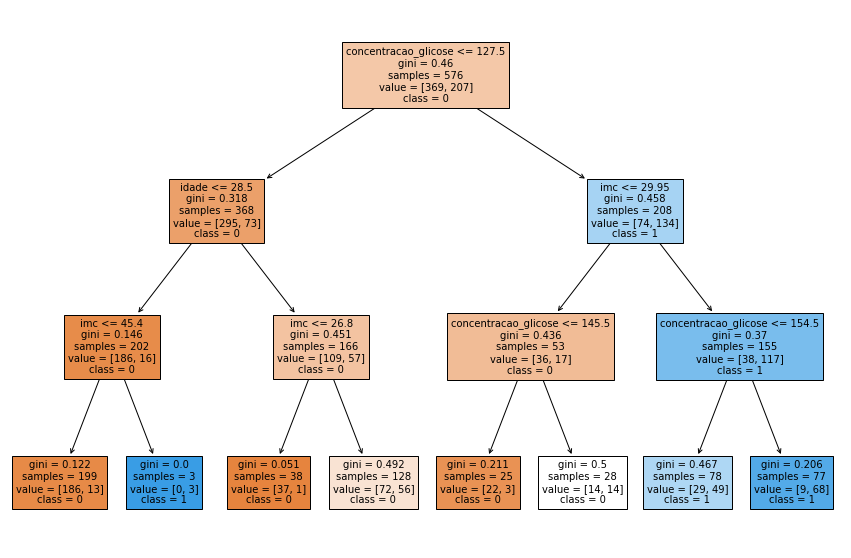

In [38]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15, 10))
tree.plot_tree(clf_tree, 
               feature_names = diabetes_dataset.columns, 
               fontsize = 10, 
               class_names = ['0', '1'],
               filled = True)

plt.show( )

Now that we understood our trained model, let's test our tree. For that end, we can simply do:

In [29]:
clf_tree.score(X_test, y_test)

0.75

Our classifier was able to find the correct value in 75% of cases. However, how do we know if this is a good or a bad accuracy?

For that end, we can use a benchmark model. For instance, we can use a dummy classifier:

In [30]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy = 'most_frequent')
clf_dummy.fit(X_train, y_train)

clf_dummy.score(X_test, y_test)

0.6822916666666666

So, our decision tree showed an accuracy slightly better than the dummy classifier.

Finally, let's use a confusion matrix to understand how was the accuracy of our classification model. Our test set has 192 unique entries:

In [46]:
len(y_test)

192

So, drawing a confusion matrix:

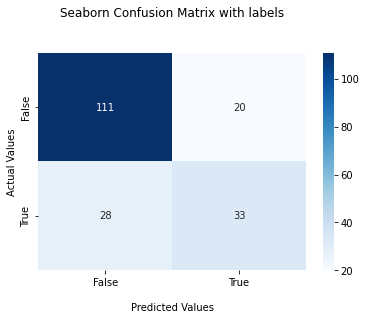

In [53]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

y_test_predict = clf_tree.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_test_predict)

ax = sns.heatmap(conf_matrix, cmap='Blues', annot = True, fmt = 'd')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

So, in our test set with 192 entries, we got 28 false negatives and 20 false positives.

Another simple models to solve classification problems is Logistic regression (binary or one vs all): https://en.wikipedia.org/wiki/Logistic_regression




# Regression

When our target is given by specific (discrete) labels, we use classification models. However, when our target is given by a continuous variable, we should use a regression model to estimate it.

There are a multitude of regression models, but the most simple (and popular) model is the linear regression. This model assumes that the target responses are related with the features by a linear function.

https://en.wikipedia.org/wiki/Linear_regression

All regression models implemented in Scikit learn can be found in:

https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

We will apply Linear Regression to estimate the heart rate using our previous dataset *batimentos_dataset*.

First, let's try to visualize how each variable alone is related to the target.

<Figure size 7200x3600 with 0 Axes>

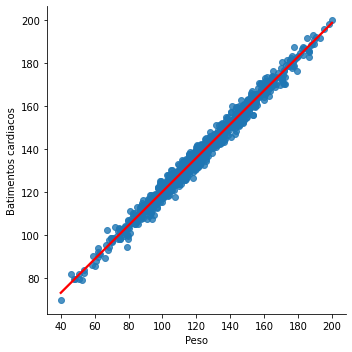

In [56]:
plt.figure(figsize=(100,50))

sns.lmplot(x = 'Peso', y = 'Batimentos cardiacos', data = batimentos_dataset, line_kws = {'color':'red'})
plt.show( )

<Figure size 7200x3600 with 0 Axes>

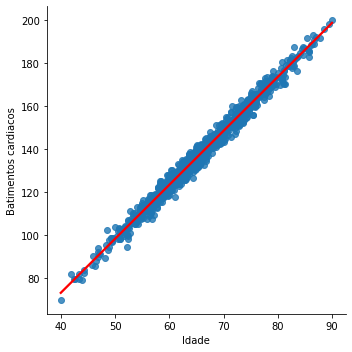

In [57]:
plt.figure(figsize=(100,50))

sns.lmplot(x = 'Idade', y = 'Batimentos cardiacos', data = batimentos_dataset, line_kws = {'color':'red'})
plt.show( )

<Figure size 7200x3600 with 0 Axes>

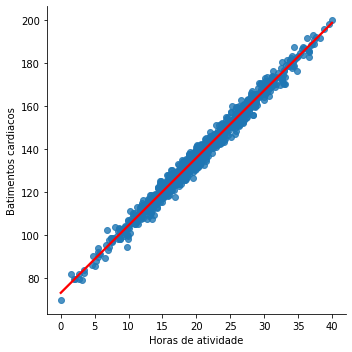

In [58]:
plt.figure(figsize=(100,50))

sns.lmplot(x = 'Horas de atividade', y = 'Batimentos cardiacos', data = batimentos_dataset, line_kws = {'color':'red'})
plt.show( )

So, our three features seem to represent very well our target! Note that a linear relationship is able to capture the general behavior of the data.

So, let's use sklearn to build a multivariate regression model:

In [77]:
x = batimentos_dataset.drop('Batimentos cardiacos', axis = 1)
y = batimentos_dataset['Batimentos cardiacos']

SEED = 4500

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = SEED)

Now, let's fit our linear model:

In [78]:
from sklearn import linear_model

In general, models benefit from previous normalization and standardization of our data.

https://scikit-learn.org/stable/modules/preprocessing.html

Let's standardize our features:

In [79]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

Then, we can do:

In [80]:
lin_rgs = linear_model.LinearRegression( )
lin_rgs.fit(X_train_scaled, y_train)

LinearRegression()

Now, let's get the average accuracy of our model:

In [81]:
lin_rgs.score(X_test_scaled, y_test)

0.9850317229130476

Nice! Our model has an outstanding accuracy of 98%. That is expected, since we saw that our data has a linear behavior.

# Clustering

On clustering models, we want to group data in a specific way. Custering is an unsupervised learning algorithm. Here, we try to find similarity in the data set.

A group is a very subjetive concept. Usually, it is not clear to the user how the algorithm grouped the data. 

Sometimes, we may want to cluster our data, so that latter we can use supervised algorithms in different clusters (or groups).

An overview over different clustering methods implemented in Sci-kit learn can be found in:

https://scikit-learn.org/stable/modules/clustering.html#clustering

To help us visualize our data, we will first consider only two variables: blood pressure (during rest) and cholesterol.

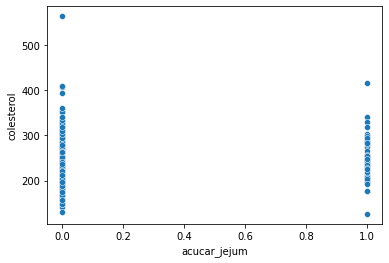

In [104]:
sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol_dataset)

We see that it is very hard to make an inference over this data. So, to cluster our data, we will use a very well-known algorithm: K-Means

In [84]:
from sklearn.cluster import KMeans

SEED = 9

kmeans = KMeans(n_clusters = 2, random_state = SEED)

On unsupervised algotihms, we have no target value. Thus, we only have a set of features:

In [85]:
x = colesterol_dataset

Using sklearn, this algorithm only works when our features are given by numeric values. If we take a look at our dataset, all of our features are indeed numeric:

In [88]:
x.head( )

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


However, when we look at the typing of this data, we see that there are some columns that have type = 'object'

In [89]:
x.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  num_princ_vasos               303 non-null    object 
 11  thal                          303 non-null    object 
 12  diag_doenca_cardiaca          303 non-null    int64  
 13  coles

That occurs because we have some values from these columns which is actually equal to a string: '?'

In [90]:
x['num_princ_vasos'].unique( )

array(['0', '3', '2', '1', '?'], dtype=object)

In [91]:
x['thal'].unique( )

array(['6', '3', '7', '?'], dtype=object)

To avoid problems with such columns, we may simply ignore them by doing:

In [96]:
x = colesterol_dataset.select_dtypes(include = ['int64', 'float64'])

In [97]:
x.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         303 non-null    int64  
 1   genero                        303 non-null    int64  
 2   tipo_dor_peito                303 non-null    int64  
 3   pressao_sanguinea_repouso     303 non-null    int64  
 4   acucar_jejum                  303 non-null    int64  
 5   resultado_eletrocardio        303 non-null    int64  
 6   freq_cardio_max               303 non-null    int64  
 7   angina_exercicio              303 non-null    int64  
 8   depressao_induzida_exercicio  303 non-null    float64
 9   inclinacao                    303 non-null    int64  
 10  diag_doenca_cardiaca          303 non-null    int64  
 11  colesterol                    303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


Finally, let's fit our KMeans model:

In [98]:
kmeans.fit(x)

KMeans(n_clusters=2, random_state=9)

To see our clusters, we can do:

In [99]:
kmeans.labels_

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

So, each of our data points have a labels related to it (0 or 1). We can visualize these clusters using a scatter plot:

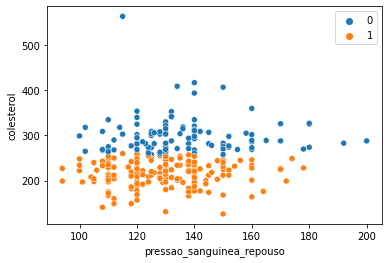

In [106]:
sns.scatterplot(x = 'pressao_sanguinea_repouso', y = 'colesterol', data = colesterol_dataset, hue = kmeans.labels_)

Nice! Our algorithm was able to separe these two groups, and it basically depends on their cholesterol: If they have high cholesterol, they are clustered in cluster 0, and if they have low cholesterol they are clustered in cluster 1.

We can also add our clusters as a new column in our dataframe:

In [108]:
colesterol_dataset['clusters'] = kmeans.labels_

colesterol_dataset.head( )

,idade,genero,tipo_dor_peito,pressao_sanguinea_repouso,acucar_jejum,resultado_eletrocardio,freq_cardio_max,angina_exercicio,depressao_induzida_exercicio,inclinacao,num_princ_vasos,thal,diag_doenca_cardiaca,colesterol,clusters
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233,1
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286,0
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229,1
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250,1
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204,1


And then, we can get, for instance, information about the cholesterol of each group:

In [113]:
colesterol_grouped = colesterol_dataset.groupby(['clusters'])['colesterol']

In [115]:
colesterol_grouped.describe( ).round(2)

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,111.0,298.96,41.14,258.0,271.0,289.0,310.0,564.0
1,192.0,216.47,27.53,126.0,199.0,220.0,239.0,260.0


We see that the mean cholesterol is very different in both clusters!

# How to choose the right estimator?

Usually, it is not that hard to identify the type of problem we are dealing with (clustering, regression or classification). However, in each category, we have a **multitude** of possible algorithms. 

In sklearn documentation, we have a very interesting tree to help us to choose with algorithm to use, based on our dataset and what we want to do with data. This can be found in:

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

